# Example: Apple Inc. (AAPL) stock data using the `yfinance` library

Make sure you have the `yfinance` and `matplotlib` libraries installed in your environment before running this code. You can install them using the following commands:

[Note: `#` is used for commenting in Python. Delete this symbol if you want the code to be executed. Insert this symbol in from of the code to comment it out]
b

In [ ]:
#!pip install yfinance
#!pip install matplotlib

In [2]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Download AAPL stock data
aapl = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

C:\Users\129895\AppData\Roaming\Python\Python39\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


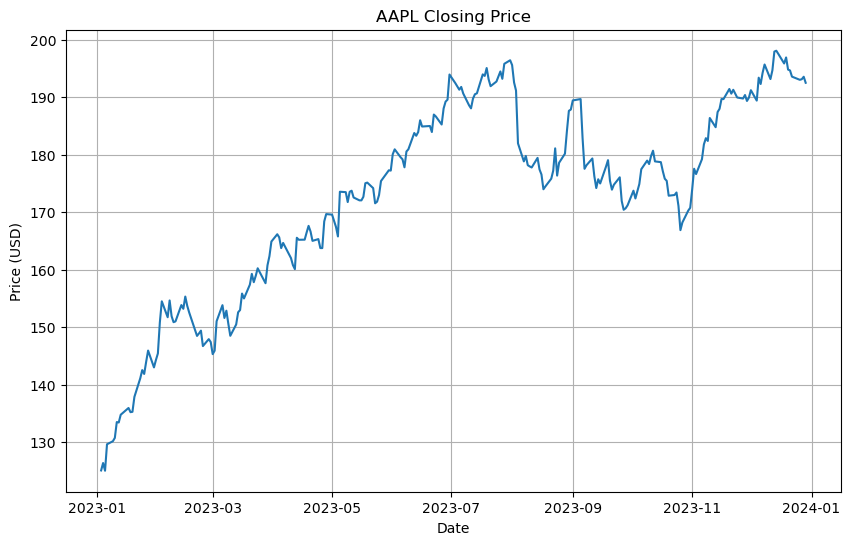

In [5]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(aapl['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

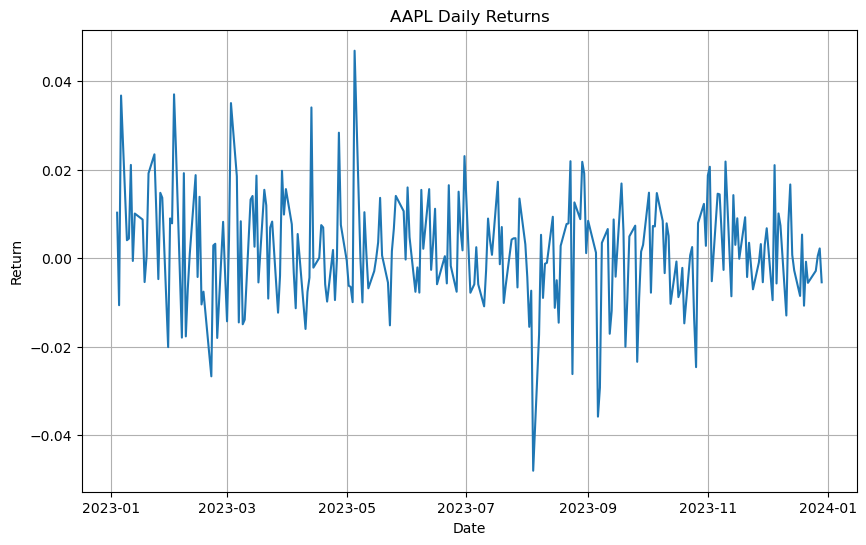

In [6]:
# Calculate daily returns
aapl['Daily Return'] = aapl['Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(aapl['Daily Return'])
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

# Resources:

1. Introduction to ML using Python: https://github.com/justmarkham/scikit-learn-videos
2. Introduction to Python: https://github.com/VitaliAlexeev/PythonBootcampWeek1